# Example: 2012 Federal Election Commission Database

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

The US Federal Election Commission publishes data on contributions to political cam-paigns. This includes contributor names, occupation and employer, address, and con-tribution amount. An interesting dataset is from the 2012 US presidential election(http://www.fec.gov/disclosurep/PDownload.do). As of this writing (June 2012), the fulldataset for all states is a 150 megabyte CSV file P00000001-ALL.csv, which can be loadedwith pandas.read_csv

Download here: https://github.com/wesm/pydata-book/blob/master/ch09/P00000001-ALL.csv

In [4]:
fec = pd.read_csv('data/P00000001-ALL.csv')

IOError: File data/P00000001-ALL.csv does not exist

In [3]:
fec.ix[200232]

cmte_id                    C00431445
cand_id                    P80003338
cand_nm                Obama, Barack
contbr_nm            DUROCHER, ANGUS
contbr_city            SAN FRANCISCO
contbr_st                         CA
contbr_zip                 941103013
contbr_employer                  OFA
contbr_occupation           ENGINEER
contb_receipt_amt               4.75
contb_receipt_dt           10-JAN-12
receipt_desc                     NaN
memo_cd                          NaN
memo_text                        NaN
form_tp                        SA17A
file_num                      775668
Name: 200232, dtype: object

We can get a list of all the unique political candidates using unique (notethat NumPy suppresses the quotes around the strings in the output):

In [4]:
unique_cands = fec.cand_nm.unique()

In [5]:
unique_cands

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick', 'Cain, Herman',
       'Gingrich, Newt', 'McCotter, Thaddeus G', 'Huntsman, Jon',
       'Perry, Rick'], dtype=object)

As we see, there is no info about party, we should add it to our data. It'll helpful later

In [6]:
parties = {'Bachmann, Michelle': 'Republican',
           'Cain, Herman': 'Republican',
           'Gingrich, Newt': 'Republican',
           'Huntsman, Jon': 'Republican',
           'Johnson, Gary Earl': 'Republican',
           'McCotter, Thaddeus G': 'Republican',
           'Obama, Barack': 'Democrat',
           'Paul, Ron': 'Republican',
           'Pawlenty, Timothy': 'Republican',
           'Perry, Rick': 'Republican',
           "Roemer, Charles E. 'Buddy' III": 'Republican',
           'Romney, Mitt': 'Republican',
           'Santorum, Rick': 'Republican'}

Now, using this mapping and the map method on Series objects, you can compute anarray of political parties from the candidate names:

In [7]:
fec.cand_nm[1000: 2000].map(parties)

1000    Republican
1001    Republican
1002    Republican
1003    Republican
1004    Republican
1005    Republican
1006    Republican
1007    Republican
1008    Republican
1009    Republican
1010    Republican
1011    Republican
1012    Republican
1013    Republican
1014    Republican
1015    Republican
1016    Republican
1017    Republican
1018    Republican
1019    Republican
1020    Republican
1021    Republican
1022    Republican
1023    Republican
1024    Republican
1025    Republican
1026    Republican
1027    Republican
1028    Republican
1029    Republican
           ...    
1970    Republican
1971    Republican
1972    Republican
1973    Republican
1974    Republican
1975    Republican
1976    Republican
1977    Republican
1978    Republican
1979    Republican
1980    Republican
1981    Republican
1982    Republican
1983    Republican
1984    Republican
1985    Republican
1986    Republican
1987    Republican
1988    Republican
1989    Republican
1990    Republican
1991    Repu

Add it to one of data's column:

In [8]:
fec['party'] = fec.cand_nm.map(parties)

In [9]:
fec

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,party
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073,Republican
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073,Republican
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
5,C00410118,P20002978,"Bachmann, Michelle","BECKMAN, JAMES",SPRINGDALE,AR,7.27647e+08,NONE,RETIRED,500.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
6,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,21-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
7,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073,Republican
8,C00410118,P20002978,"Bachmann, Michelle","COLLINS, SARAH",MESA,AZ,8.52107e+08,ST. JOSEPH HOSPITAL,RN,250.0,21-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
9,C00410118,P20002978,"Bachmann, Michelle","COLEMAN, RONALD",TUCSON,AZ,8.57499e+08,RAYTHEON,ELECTRICAL ENGINEER,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican


In [10]:
fec['party'].value_counts()

Democrat      593746
Republican    407985
Name: party, dtype: int64

A couple of data preparation points. First, this data includes both contributions and refunds (negative contribution amount)

In [11]:
(fec.contb_receipt_amt > 0).value_counts()

True     991475
False     10256
Name: contb_receipt_amt, dtype: int64

To simplify the analysis, I’ll restrict the data set to positive contributions:

In [12]:
fec = fec[fec['contb_receipt_amt'] > 0]

In 2012 election, there are 2 main candicates: Obama and Mitt Rommey. Thus, we'll only prepare a subset that has contributors to their campains

In [13]:
fec_mrbo = fec[(fec.cand_nm == 'Obama, Barack') | (fec.cand_nm == 'Romney, Mitt')]

## Donation Statistics by Occupation and Employer

Donations by occupation is another oft-studied statistic

While Democrats was donated by lawyers, Repulicans was donated by bussiness. The data says us that

In [14]:
fec.contbr_occupation.value_counts().head(10)

RETIRED                                   233990
INFORMATION REQUESTED                      35107
ATTORNEY                                   34286
HOMEMAKER                                  29931
PHYSICIAN                                  23432
INFORMATION REQUESTED PER BEST EFFORTS     21138
ENGINEER                                   14334
TEACHER                                    13990
CONSULTANT                                 13273
PROFESSOR                                  12555
Name: contbr_occupation, dtype: int64

As we see, some occupations are the same type, and we have a trick to map them into one type:

In [15]:
occ_mapping = {   
    'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED',   
    'INFORMATION REQUESTED' : 'NOT PROVIDED',   
    'INFORMATION REQUESTED (BEST EFFORTS)' : 'NOT PROVIDED',   
    'C.E.O.': 'CEO'
}

In [16]:
f = lambda x: occ_mapping.get(x,x)
fec.contbr_occupation = fec.contbr_occupation.map(f)

C:\Program Files\Anaconda2\lib\site-packages\pandas\core\generic.py:2701: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [17]:
fec.contbr_occupation.value_counts().head(10)

RETIRED         233990
NOT PROVIDED     57151
ATTORNEY         34286
HOMEMAKER        29931
PHYSICIAN        23432
ENGINEER         14334
TEACHER          13990
CONSULTANT       13273
PROFESSOR        12555
NOT EMPLOYED      9828
Name: contbr_occupation, dtype: int64

Do the same thing with employee

In [18]:
fec.contbr_employer.value_counts().head(10)

RETIRED                                   206675
SELF-EMPLOYED                              94505
NOT EMPLOYED                               45877
INFORMATION REQUESTED                      36135
SELF                                       24385
INFORMATION REQUESTED PER BEST EFFORTS     22260
NONE                                       19929
HOMEMAKER                                  18269
SELF EMPLOYED                               6274
REQUESTED                                   4233
Name: contbr_employer, dtype: int64

In [19]:
emp_mapping = {
   'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED',
   'INFORMATION REQUESTED' : 'NOT PROVIDED',
   'SELF' : 'SELF-EMPLOYED',
   'SELF EMPLOYED' : 'SELF-EMPLOYED',
}

In [20]:
f = lambda x: emp_mapping.get(x,x)
fec.contbr_employer = fec.contbr_employer.map(f)

In [21]:
fec.contbr_employer.value_counts().head(10)

RETIRED          206675
SELF-EMPLOYED    125164
NOT PROVIDED      58396
NOT EMPLOYED      45877
NONE              19929
HOMEMAKER         18269
REQUESTED          4233
UNEMPLOYED         2514
US ARMY            1817
STUDENT            1786
Name: contbr_employer, dtype: int64

Now, you can use **pivot_table** to aggregate the data by party and occupation, then filter down to the subset that donated at least $2 million overall:

In [22]:
by_occupation = fec.pivot_table('contb_receipt_amt',
                                index='contbr_occupation',
                                columns='party', aggfunc='sum')

In [23]:
by_occupation

party,Democrat,Republican
contbr_occupation,,
MIXED-MEDIA ARTIST / STORYTELLER,100.0,NaN
AREA VICE PRESIDENT,250.0,NaN
RESEARCH ASSOCIATE,100.0,NaN
TEACHER,500.0,NaN
THERAPIST,3900.0,NaN
'MIS MANAGER,NaN,177.60
(PART-TIME) SALES CONSULTANT & WRITER,NaN,285.00
(RETIRED),NaN,250.00
-,5000.0,2114.80


In [24]:
over_2mm = by_occupation[by_occupation.sum(axis=1) > 2000000]
over_2mm

party,Democrat,Republican
contbr_occupation,,
ATTORNEY,11141982.97,7.477194e+06
CEO,2074974.79,4.211041e+06
CONSULTANT,2459912.71,2.544725e+06
ENGINEER,951525.55,1.818374e+06
EXECUTIVE,1355161.05,4.138850e+06
HOMEMAKER,4248875.80,1.363428e+07
INVESTOR,884133.00,2.431769e+06
LAWYER,3160478.87,3.912243e+05
MANAGER,762883.22,1.444532e+06


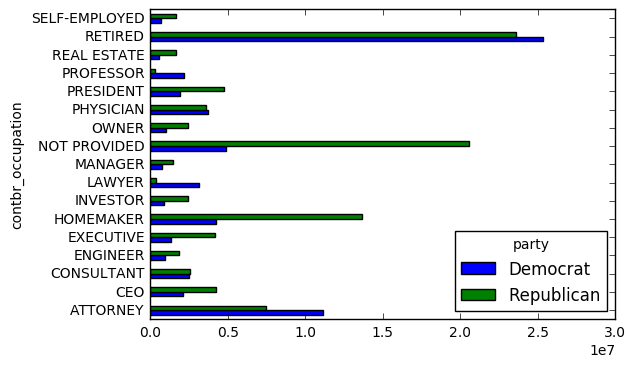

In [25]:
over_2mm.plot(kind='barh')

You might be interested in the top donor occupations or top companies donating toObama and Romney. To do this, you can group by candidate name and use a variant of the top method from earlier in the chapter:

In [26]:
def get_top_amount(group, key, n=5, columns='contb_receipt_amt'):
    totals = group.groupby(key)[columns].sum()
    return totals.sort_values(ascending=False)[:n]

In [27]:
fec_mrbo = fec[(fec.cand_nm == 'Obama, Barack') | (fec.cand_nm == 'Romney, Mitt')]
grouped = fec_mrbo.groupby('cand_nm')
grouped.apply(get_top_amount, 'contbr_occupation', n = 7)

cand_nm        contbr_occupation
Obama, Barack  RETIRED              25305116.38
               ATTORNEY             11141982.97
               NOT PROVIDED          4866973.96
               HOMEMAKER             4248875.80
               PHYSICIAN             3735124.94
               LAWYER                3160478.87
               CONSULTANT            2459912.71
Romney, Mitt   RETIRED              11508473.59
               NOT PROVIDED         11396894.84
               HOMEMAKER             8147446.22
               ATTORNEY              5364718.82
               PRESIDENT             2491244.89
               CEO                   2324297.03
               EXECUTIVE             2300947.03
Name: contb_receipt_amt, dtype: float64

In [28]:
grouped.apply(get_top_amount, 'contbr_employer', n = 10)

cand_nm        contbr_employer   
Obama, Barack  RETIRED               22694358.85
               SELF-EMPLOYED         18626807.16
               NOT EMPLOYED           8586308.70
               NOT PROVIDED           5053480.37
               HOMEMAKER              2605408.54
               STUDENT                 318831.45
               VOLUNTEER               257104.00
               MICROSOFT               215585.36
               SIDLEY AUSTIN LLP       168254.00
               REFUSED                 149516.07
Romney, Mitt   NOT PROVIDED          12059527.24
               RETIRED               11506225.71
               HOMEMAKER              8147196.22
               SELF-EMPLOYED          7414115.22
               STUDENT                 496490.94
               CREDIT SUISSE           281150.00
               MORGAN STANLEY          267266.00
               GOLDMAN SACH & CO.      238250.00
               BARCLAYS CAPITAL        162750.00
               H.I.G. CAPITAL      

## Bucketing Donation Amounts

A useful way to analyze this data is to use the cut function to discretize the contributor amounts into buckets by contribution size:

In [29]:
bins = np.array([0, 1, 10, 100, 1000, 10000, 100000, 1000000, 10000000])

In [30]:
labels = pd.cut(fec_mrbo.contb_receipt_amt, bins)

In [31]:
labels

411           (10, 100]
412         (100, 1000]
413         (100, 1000]
414           (10, 100]
415           (10, 100]
416           (10, 100]
417         (100, 1000]
418           (10, 100]
419         (100, 1000]
420           (10, 100]
421           (10, 100]
422         (100, 1000]
423         (100, 1000]
424         (100, 1000]
425         (100, 1000]
426         (100, 1000]
427       (1000, 10000]
428         (100, 1000]
429         (100, 1000]
430           (10, 100]
431       (1000, 10000]
432         (100, 1000]
433         (100, 1000]
434         (100, 1000]
435         (100, 1000]
436         (100, 1000]
437           (10, 100]
438         (100, 1000]
439         (100, 1000]
440           (10, 100]
              ...      
701356        (10, 100]
701357          (1, 10]
701358        (10, 100]
701359        (10, 100]
701360        (10, 100]
701361        (10, 100]
701362      (100, 1000]
701363        (10, 100]
701364        (10, 100]
701365        (10, 100]
701366        (1

We can then group the data for Obama and Romney by name and bin label to get ahistogram by donation size:

In [32]:
grouped = fec_mrbo.groupby(['cand_nm', labels])

In [33]:
grouped.size().unstack(0)

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",493.0,77.0
"(1, 10]",40070.0,3681.0
"(10, 100]",372280.0,31853.0
"(100, 1000]",153991.0,43357.0
"(1000, 10000]",22284.0,26186.0
"(10000, 100000]",2.0,1.0
"(100000, 1000000]",3.0,NaN
"(1000000, 10000000]",4.0,NaN


In [34]:
bucket_sums = grouped.contb_receipt_amt.sum().unstack(0)
bucket_sums

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",318.24,77.00
"(1, 10]",337267.62,29819.66
"(10, 100]",20288981.41,1987783.76
"(100, 1000]",54798531.46,22363381.69
"(1000, 10000]",51753705.67,63942145.42
"(10000, 100000]",59100.00,12700.00
"(100000, 1000000]",1490683.08,NaN
"(1000000, 10000000]",7148839.76,NaN


In [35]:
normal_sum = bucket_sums.div(bucket_sums.sum(axis=1), axis=0)
normal_sum

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",0.805182,0.194818
"(1, 10]",0.918767,0.081233
"(10, 100]",0.910769,0.089231
"(100, 1000]",0.710176,0.289824
"(1000, 10000]",0.447326,0.552674
"(10000, 100000]",0.823120,0.176880
"(100000, 1000000]",1.000000,NaN
"(1000000, 10000000]",1.000000,NaN


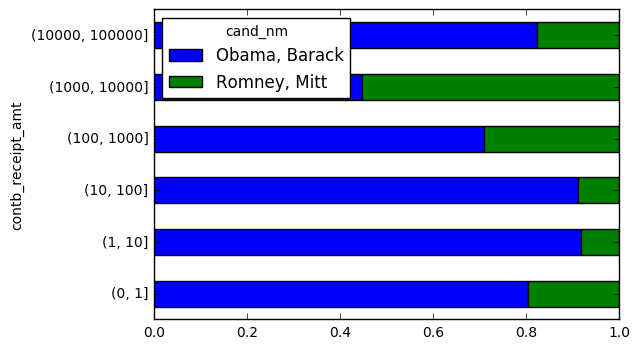

In [36]:
normal_sum[:-2].plot(kind='barh', stacked=True)

## Donation Statistics by State

In [37]:
grouped = fec_mrbo.groupby(['cand_nm', 'contbr_st'])
totals = grouped.contb_receipt_amt.sum().unstack(0).fillna(0)
totals = totals[totals.sum(1) > 100000]
totals[:10]

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AK,281840.15,86204.24
AL,543123.48,527303.51
AR,359247.28,105556.00
AZ,1506476.98,1888436.23
CA,23824984.24,11237636.60
CO,2132429.49,1506714.12
CT,2068291.26,3499475.45
DC,4373538.80,1025137.50
DE,336669.14,82712.00


In [38]:
percent = totals.div(totals.sum(1), axis=0)
percent[:10]

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AK,0.765778,0.234222
AL,0.507390,0.492610
AR,0.772902,0.227098
AZ,0.443745,0.556255
CA,0.679498,0.320502
CO,0.585970,0.414030
CT,0.371476,0.628524
DC,0.810113,0.189887
DE,0.802776,0.197224


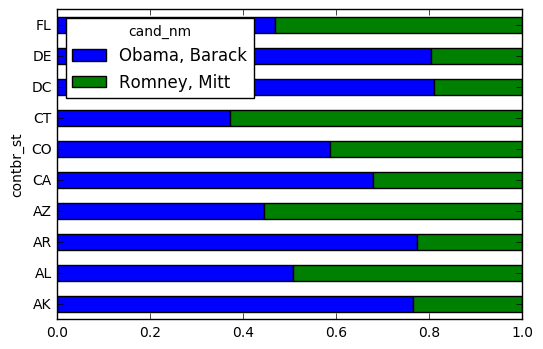

In [39]:
percent[:10].plot(kind='barh', stacked=True)

TypeError: 'module' object is not callable

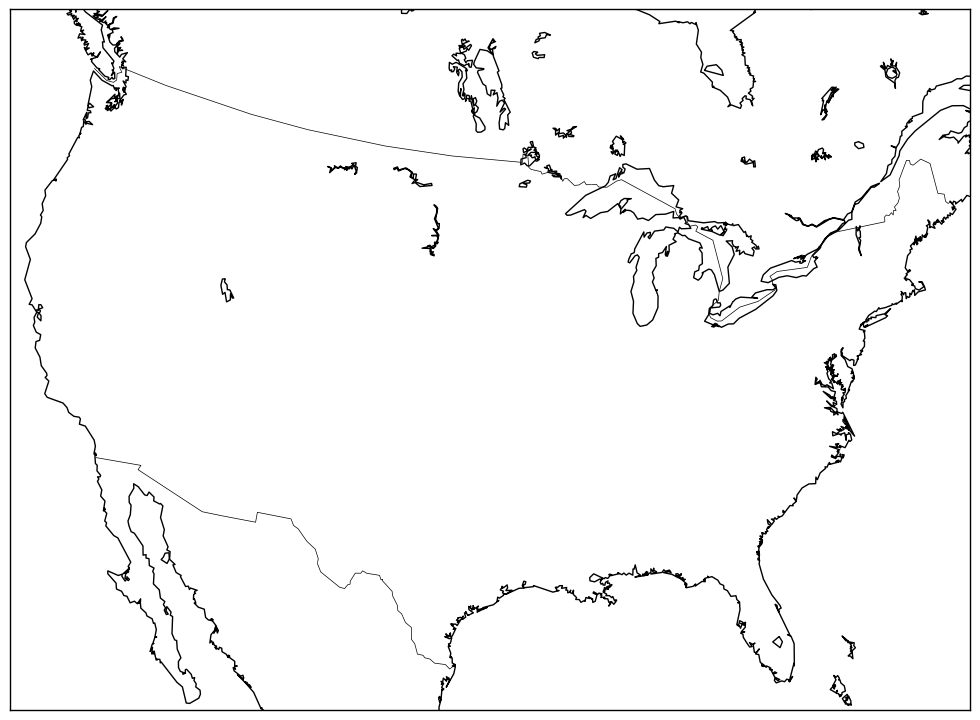

In [45]:
from mpl_toolkits.basemap import Basemap, cm
import numpy as np
from matplotlib import rcParams
from matplotlib.collections import LineCollection
import matplotlib.pyplot as plt
import shapefile
obama = percent['Obama, Barack']
fig = plt.figure(figsize=(12, 12))
ax = fig.add_axes([0.1,0.1,0.8,0.8])
lllat = 21; urlat = 53; lllon = -118; urlon = -62
m = Basemap(ax=ax, projection='stere',
lon_0=(urlon + lllon) / 2, lat_0=(urlat + lllat) / 2,
llcrnrlat=lllat, urcrnrlat=urlat, llcrnrlon=lllon,
urcrnrlon=urlon, resolution='l')
m.drawcoastlines()
m.drawcountries()
shp = shapefile('../states/statesp020')
dbf = dbflib.open('../states/statesp020')
for npoly in range(shp.info()[0]):
# Draw colored polygons on the map
    shpsegs = []
    shp_object = shp.read_object(npoly)
    verts = shp_object.vertices()
    rings = len(verts)
    for ring in range(rings):
        lons, lats = zip(*verts[ring])
        x, y = m(lons, lats)
        shpsegs.append(zip(x,y))
        if ring == 0:
            shapedict = dbf.read_record(npoly)
        name = shapedict['STATE']
    lines = LineCollection(shpsegs,antialiaseds=(1,))
    # state_to_code dict, e.g. 'ALASKA' -> 'AK', omitted
    try:
        per = obama[state_to_code[name.upper()]]
    except KeyError:
        continue
    lines.set_facecolors('k')
    lines.set_alpha(0.75 * per) # Shrink the percentage a bit
    lines.set_edgecolors('k')
    lines.set_linewidth(0.3)
    ax.add_collection(lines)